### Load dependencies 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Prepare Data

In [2]:
df = pd.read_csv("spam.csv", encoding = 'latin-1') 
# Data Source: UCI machine learning repository-- SMS Spam Collection dataset

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})

In [5]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

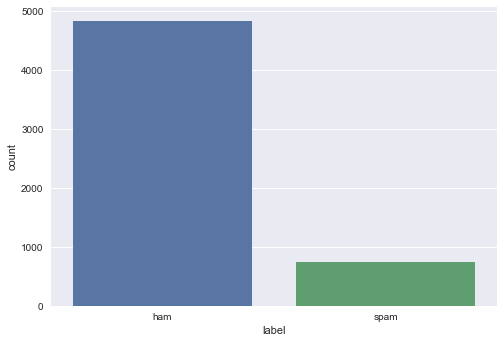

In [6]:
sns.countplot(data['label'],label="Count")
plt.show()

In [7]:
data['label_numeric'] = list(map(lambda x: 1 if x == "spam" else 0, data["label"]))
# make numerical labels

In [8]:
data.head()

,label,text,label_numeric
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### Train-Test split

In [9]:
# Train-test split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size = 0.4, random_state = 42)
np.shape(train_set)

(3343, 3)

### Text transformation

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
train_set_vect = count_vect.fit_transform(train_set.text)
test_set_vect = count_vect.transform(test_set.text)

In [11]:
print(np.shape(train_set_vect))
print(np.shape(test_set_vect))
len(count_vect.get_feature_names())

(3343, 6663)
(2229, 6663)


6663

### Naive Bayes Classifier 

In [12]:
#Multimomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(train_set_vect, train_set.label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Test Model

In [13]:
# Test model
SMS = ["Free ticket", "Good morning", "fine fine fine"]
SMS_vect = count_vect.transform(SMS)
print(model.predict_proba(SMS_vect))
print(model.predict(SMS_vect))
print(SMS_vect)
#from scipy.sparse import csr_matrix
#print(np.shape(SMS_vect.toarray()))

#count_vect.get_feature_names()

f = pd.DataFrame(SMS_vect.toarray(), columns=count_vect.get_feature_names())


[[  3.29356140e-01   6.70643860e-01]
 [  9.99121022e-01   8.78977963e-04]
 [  9.99938437e-01   6.15628263e-05]]
['spam' 'ham' 'ham']
  (0, 2583)	1
  (0, 5901)	1
  (1, 2744)	1
  (1, 3939)	1
  (2, 2472)	3


### Performance measure

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
prediction = model.predict(test_set_vect)
prediction_numeric = list(map(lambda x: 1 if x == "spam" else 0, prediction))

In [16]:
accuracy_score(prediction, test_set.label)

0.98340062808434281

In [17]:
confusion_matrix(prediction, test_set.label)

array([[1922,   29],
       [   8,  270]])

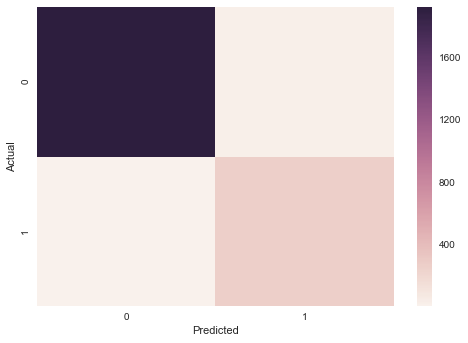

In [18]:
sns.heatmap(confusion_matrix(prediction, test_set.label.tolist()))
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [20]:
precision_score(test_set.label_numeric, prediction_numeric)

0.97122302158273377

In [21]:
recall_score(prediction_numeric, test_set.label_numeric)

0.97122302158273377

In [22]:
f1_score(prediction_numeric, test_set.label_numeric)

0.93587521663778162

### Spam misclassified as ham (false positives)

In [23]:
test_set[test_set["label_numeric"] > prediction_numeric]

,label,text,label_numeric
683,spam,Hi I'm sue. I am 20 years old and work as a la...,1
3979,spam,ringtoneking 84484,1
1268,spam,Can U get 2 phone NOW? I wanna chat 2 set up m...,1
730,spam,Email AlertFrom: Jeri StewartSize: 2KBSubject:...,1
2662,spam,Hello darling how are you today? I would love ...,1
3130,spam,LookAtMe!: Thanks for your purchase of a video...,1
4296,spam,thesmszone.com lets you send free anonymous an...,1
1468,spam,Hi its LUCY Hubby at meetins all day Fri & I w...,1
787,spam,Ever thought about living a good life with a p...,1
2351,spam,Download as many ringtones as u like no restri...,1


### Ham misclassified as Spam (false negetives)

In [24]:
test_set[test_set["label_numeric"]< prediction_numeric]

,label,text,label_numeric
4700,ham,I liked the new mobile,0
1505,ham,Total video converter free download type this ...,0
5044,ham,We have sent JD for Customer Service cum Accou...,0
4701,ham,Anytime...,0
420,ham,Yes:)from last week itself i'm taking live call.,0
4727,ham,I (Career Tel) have added u as a contact on IN...,0
1259,ham,We have sent JD for Customer Service cum Accou...,0
990,ham,26th OF JULY,0


## Decision boundary


In [25]:
from scipy.sparse import csr_matrix
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
train_ar = np.array(csr_matrix.todense(train_set_vect))

In [26]:
X = pca.fit_transform(train_ar)

df_proj = pd.DataFrame({"x1": X[:,0], "x2":X[:,1], "label": train_set.label.tolist()})

In [27]:
fig = plt.figure(figsize = (15,15))
labels = ["spam", "ham"]

for i in range(len(labels)):
    df_proj_i = df_proj[df_proj["label"] == labels[i]]
    X1,X2 = df_proj_i["x1"].values.tolist(), df_proj_i["x2"].values.tolist()
    plt.scatter(X1,X2, alpha = 0.5)


In [28]:
Y_predicted = model.predict(train_set_vect)

Y_predicted_num = list(map(lambda x: 1 if x == "spam" else 0, Y_predicted))

Y_predicted_proba = [x[0] for x in model.predict_proba(train_set_vect)]

In [29]:
h = 0.01
# create a mesh to plot in
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

from sklearn.neighbors.classification import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
voronoi_model = knn.fit(X,Y_predicted_num)

Z = voronoi_model.predict(np.c_[xx.ravel(), yy.ravel()])

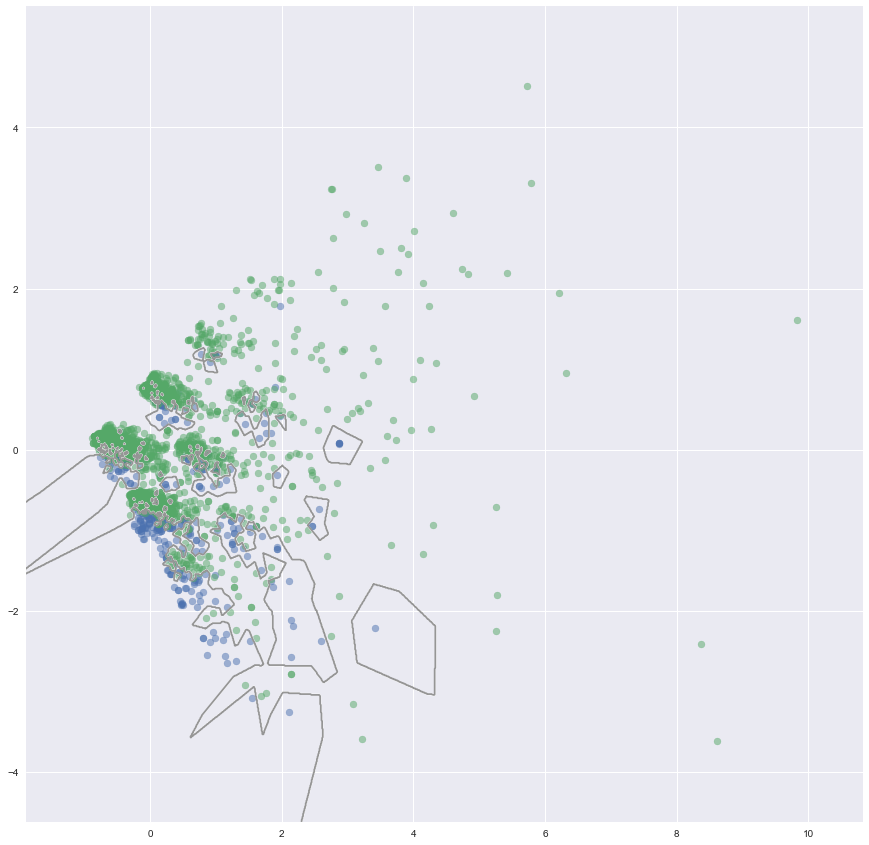

In [30]:
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels = [0,0.5,1])
plt.show()